# Data Mining

## 1. Pre-set

In [52]:
# Import libraries to use 
library(caret) # Classification and regression training 
library(ggplot2) # Data visualization
library(MLmetrics) # Machine learning evaluation metrics
library(nnet)
library(NeuralNetTools)
library(rpart)
library(rpart.plot)

# Read the provided files into train, test and submission objects 
train<-read.csv("C:/Users/sanie.s.rojas.lobo/Documents/uzzipped/train.csv")
test<-read.csv("C:/Users/sanie.s.rojas.lobo/Documents/uzzipped/test.csv")
submission <- read.csv("C:/Users/sanie.s.rojas.lobo/Documents/uzzipped/submission.csv", stringsAsFactors = F)

# Generate databases 
train <- train[,-1] 
test_id <- test[,1] 
test <- test[,-1]

In [2]:
# Transform to factor the categorical variables for both, test and train sets 
train$area <- as.factor(train$area)
train$tuvo_un_accidente_laboral <- as.factor(train$tuvo_un_accidente_laboral)
train$promociones_ultimos_5_anios <- as.factor(train$promociones_ultimos_5_anios)
train$salario <- factor(train$salario, levels= c("bajo", "medio", "alto")) # ranking the categories by level 
train$se_fue <- factor(train$se_fue)

test$area <- as.factor(test$area)
test$tuvo_un_accidente_laboral <- as.factor(test$tuvo_un_accidente_laboral)
test$promociones_ultimos_5_anios <- as.factor(test$promociones_ultimos_5_anios)
test$salario <- factor(test$salario, levels= c("bajo", "medio", "alto"))
test$se_fue <- factor(test$se_fue)


# Generate an initial data partition to train and test 
set.seed(12345)
partition <- createDataPartition(train$se_fue, p=0.80, list=FALSE) #
train_set <- train[partition,]
val_set <- train[-partition,]
val_set$se_fue = as.factor(val_set$se_fue) 

## 2.Exploratory Data Analysis

In [50]:
stats_train = summary(train)
sum(is.na(train_set))

[1] 0

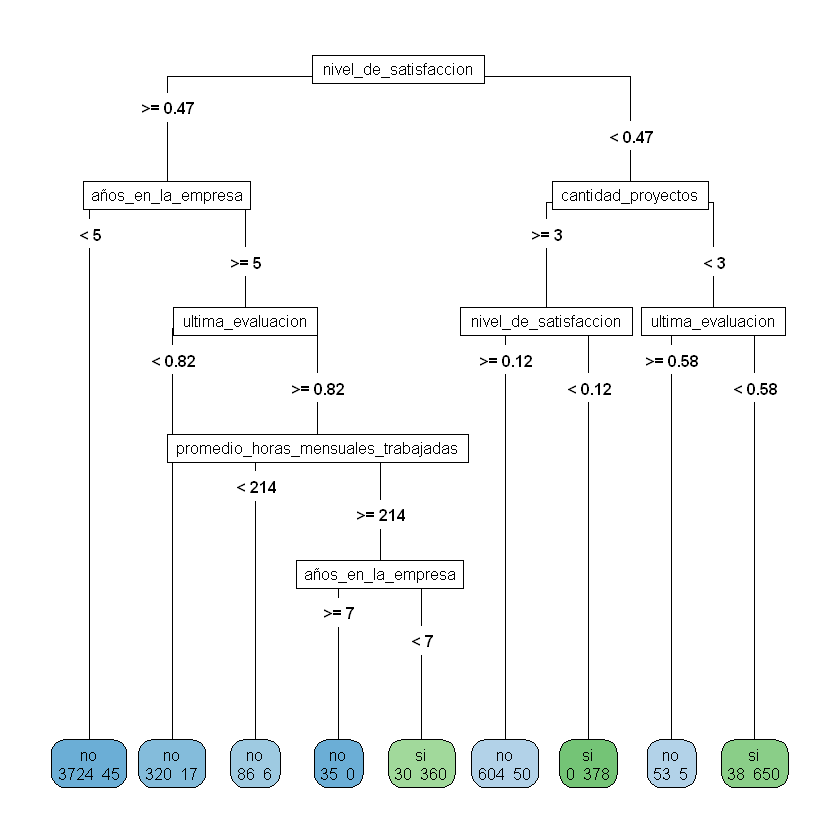

In [53]:
#generating an inital partition to see most relevant variables
arbol=rpart(se_fue~., train_set, method = "class")
rpart.plot(arbol, extra=1, type=5)

At first sight:
- Having low amount of proyect and poor evaluation might lead to resignation 
- Having a high amount of projects and a low satisfaction level leads to resignation
- People resigning have less than 7 years at the firm 
- A clasiffication algorithm might be leveraged to generate predictions

See further data analysis on the PowerBI Dashboard https://app.powerbi.com/groups/0e6d093e-8a7c-4f3d-934d-6a22b9769ef7/reports/e7d49d14-a2db-49df-88d6-894d028729dc?ctid=e0793d39-0939-496d-b129-198edd916feb&pbi_source=linkShare 

## 3.Testing different models with Train function

In [4]:
#de-randomize for reproducibility
set.seed(12345)

# Generate a control variable to manage computational nuances of train method as listed in https://www.rdocumentation.org/packages/caret/versions/6.0-92/topics/trainControl
control <- trainControl(
                        method="cv", #resampling method
                        number=10,
                        classProbs= TRUE, # logical; should class probabilities be computed for classification models (along with predicted values) in each resample?
                        summaryFunction = multiClassSummary) #computes some overall measures of for performance (e.g. overall accuracy and the Kappa statistic) and several averages of statistics calculated from "one-versus-all" configurations.


#Defining a metric to monitor 
metric <- "logLoss" #aka logistic loss or cross-entropy loss, lower log-loss value means better predictions


In [6]:
#Selecting methods to test - Note: this takes c.2 hours to run

methods_running = c("rpart","bayesglm","kknn", "xgbdart", "nnet" )


#Traing our selected methods to compare initial results and optimize the most effectives

#Recursive Partitioning and Regression Trees build classification or regression models of a very general structure using a two stage procedure; the resulting models can be represented as binary trees.
m_rpart <- train(se_fue~., data=train_set, method="rpart", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )

#XGBost
m_xgbDART <- train(se_fue~., data=train_set, method="xgbDART", metric=metric, 
                   trControl=control, preProcess = c("center", "scale"),  verbose = FALSE,
                   verbosity = 0 )

#k-Nearest Neighbors
m_kknn <- train(se_fue~., data=train_set, method="kknn", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )

#Bayesian Generalized Linear Model
m_bglm <- train(se_fue~., data=train_set, method="bayesglm", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )

#Neural Networks
m_nnet= train(se_fue~., data=train_set, method="nnet", maxit=10000,metric=metric, 
                trControl = trainControl(method="cv",10),tuneGrid=expand.grid(size=c(10,15,20), decay=0.3))
#Selecting methods to test

methods_running = c("rpart","bayesglm","kknn", "xgbdart", "nnet" )


#Traing our selected methods to compare initial results and optimize the most effectives

#Recursive Partitioning and Regression Trees build classification or regression models of a very general structure using a two stage procedure; the resulting models can be represented as binary trees.
m_rpart <- train(se_fue~., data=train_set, method="rpart", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )
print(m_rpart)

#XGBost
m_xgbDART <- train(se_fue~., data=train_set, method="xgbDART", metric=metric, 
                   trControl=control, preProcess = c("center", "scale"),  verbose = FALSE,
                   verbosity = 0 )
print(m_xgbDART)

#k-Nearest Neighbors
m_kknn <- train(se_fue~., data=train_set, method="kknn", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )
print(m_kknn)

#Bayesian Generalized Linear Model
m_bglm <- train(se_fue~., data=train_set, method="bayesglm", metric=metric, 
                trControl=control, preProcess = c("center", "scale") )
print(m_bglm)

#Neural Networks
m_nnet= train(se_fue~., data=train_set, method="nnet", maxit=10000,metric=metric, 
                trControl = trainControl(method="cv",10),tuneGrid=expand.grid(size=c(10,15,20), decay=0.3))
print(m_nnet)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."
Warning message in train.default(x, y, weights = w, ...):
"The metric "logLoss" was not in the result set. Accuracy will be used instead."


# weights:  201
initial  value 4109.026636 
iter  10 value 3147.992706
iter  20 value 3123.299464
iter  30 value 2896.363071
iter  40 value 2801.448138
iter  50 value 2259.979321
iter  60 value 2208.093840
iter  70 value 1743.101379
iter  80 value 1350.148019
iter  90 value 1262.942159
iter 100 value 1198.362139
iter 110 value 1153.892841
iter 120 value 1075.828032
iter 130 value 1011.444337
iter 140 value 964.461680
iter 150 value 928.931310
iter 160 value 900.934493
iter 170 value 885.712684
iter 180 value 878.165169
iter 190 value 875.782930
iter 200 value 870.970183
iter 210 value 867.767481
iter 220 value 865.023709
iter 230 value 858.838937
iter 240 value 850.140505
iter 250 value 842.692860
iter 260 value 837.405308
iter 270 value 835.543816
iter 280 value 834.418428
iter 290 value 832.458357
iter 300 value 830.420220
iter 310 value 830.052532
iter 320 value 830.003592
iter 330 value 829.787439
iter 340 value 828.383734
iter 350 value 827.203010
iter 360 value 826.848095
iter 37

initial  value 6619.405700 
iter  10 value 3152.315806
iter  20 value 2115.395405
iter  30 value 2005.408578
iter  40 value 1963.148684
iter  50 value 1596.243467
iter  60 value 1565.596976
iter  70 value 1440.864059
iter  80 value 1335.233939
iter  90 value 1290.718842
iter 100 value 1161.096826
iter 110 value 1100.330974
iter 120 value 1087.669712
iter 130 value 1033.294328
iter 140 value 987.214955
iter 150 value 948.183045
iter 160 value 914.366740
iter 170 value 900.624221
iter 180 value 892.646779
iter 190 value 879.328427
iter 200 value 873.916457
iter 210 value 871.527902
iter 220 value 869.711963
iter 230 value 869.330359
iter 240 value 869.175267
iter 250 value 868.865491
iter 260 value 868.328197
iter 270 value 868.065517
iter 280 value 868.047273
iter 290 value 868.046192
iter 300 value 868.040569
iter 310 value 868.038452
iter 310 value 868.038448
iter 310 value 868.038447
final  value 868.038447 
converged
# weights:  301
initial  value 5086.821779 
iter  10 value 3154.54

initial  value 6034.343929 
iter  10 value 3148.672082
iter  20 value 3053.869514
iter  30 value 2924.265657
iter  40 value 2063.625587
iter  50 value 2024.737976
iter  60 value 1935.566169
iter  70 value 1788.225932
iter  80 value 1649.268801
iter  90 value 1396.889346
iter 100 value 1306.782184
iter 110 value 1119.135792
iter 120 value 1047.738197
iter 130 value 1026.902908
iter 140 value 1003.556025
iter 150 value 955.299170
iter 160 value 931.872116
iter 170 value 923.566612
iter 180 value 909.290605
iter 190 value 897.232167
iter 200 value 890.209638
iter 210 value 885.636146
iter 220 value 869.868368
iter 230 value 846.482980
iter 240 value 834.461112
iter 250 value 827.582308
iter 260 value 823.719164
iter 270 value 819.335911
iter 280 value 814.814551
iter 290 value 811.988801
iter 300 value 809.507775
iter 310 value 807.145007
iter 320 value 804.247835
iter 330 value 803.012887
iter 340 value 802.060670
iter 350 value 801.045430
iter 360 value 800.447897
iter 370 value 800.054

initial  value 3236.426890 
iter  10 value 3148.630730
iter  20 value 3141.858241
iter  30 value 2910.052616
iter  40 value 2097.907179
iter  50 value 2057.220140
iter  60 value 1942.478137
iter  70 value 1815.623756
iter  80 value 1569.885446
iter  90 value 1445.925329
iter 100 value 1397.884867
iter 110 value 1346.717552
iter 120 value 1300.804846
iter 130 value 1282.577674
iter 140 value 1216.455995
iter 150 value 1119.662430
iter 160 value 1044.547396
iter 170 value 944.727644
iter 180 value 926.637799
iter 190 value 916.613246
iter 200 value 914.556679
iter 210 value 907.819148
iter 220 value 902.577491
iter 230 value 891.825748
iter 240 value 875.755243
iter 250 value 857.531013
iter 260 value 849.894599
iter 270 value 846.149359
iter 280 value 843.280171
iter 290 value 836.307624
iter 300 value 832.378758
iter 310 value 831.764872
iter 320 value 831.004650
iter 330 value 830.137737
iter 340 value 829.965507
iter 350 value 829.769995
iter 360 value 829.441967
iter 370 value 829.3

initial  value 3197.290919 
iter  10 value 3134.022084
iter  20 value 2332.716192
iter  30 value 1956.140982
iter  40 value 1857.992417
iter  50 value 1481.075369
iter  60 value 1407.196233
iter  70 value 1338.981431
iter  80 value 1282.949098
iter  90 value 1206.948672
iter 100 value 1114.822273
iter 110 value 1003.682725
iter 120 value 957.049297
iter 130 value 920.543928
iter 140 value 881.590515
iter 150 value 865.083565
iter 160 value 855.274420
iter 170 value 848.888154
iter 180 value 846.547239
iter 190 value 843.084384
iter 200 value 841.792100
iter 210 value 839.000463
iter 220 value 836.396017
iter 230 value 835.073016
iter 240 value 834.443883
iter 250 value 833.713091
iter 260 value 830.220989
iter 270 value 827.653518
iter 280 value 826.024033
iter 290 value 823.016723
iter 300 value 821.725586
iter 310 value 821.101546
iter 320 value 820.861152
iter 330 value 820.399134
iter 340 value 816.953204
iter 350 value 812.563701
iter 360 value 810.820170
iter 370 value 810.331698

initial  value 5100.778346 
iter  10 value 3503.060779
iter  20 value 3426.005646
iter  30 value 3283.918252
iter  40 value 3151.376645
iter  50 value 2739.170380
iter  60 value 2660.863843
iter  70 value 2559.893034
iter  80 value 1987.664735
iter  90 value 1723.629659
iter 100 value 1698.273475
iter 110 value 1476.145671
iter 120 value 1326.035920
iter 130 value 1243.394840
iter 140 value 1146.319388
iter 150 value 1141.655645
iter 160 value 1112.833427
iter 170 value 1052.139813
iter 180 value 1008.924755
iter 190 value 983.467879
iter 200 value 951.522480
iter 210 value 937.840256
iter 220 value 930.426873
iter 230 value 925.984950
iter 240 value 922.864561
iter 250 value 917.610444
iter 260 value 911.549772
iter 270 value 908.744774
iter 280 value 902.420758
iter 290 value 891.660126
iter 300 value 886.589795
iter 310 value 884.326753
iter 320 value 881.252535
iter 330 value 880.343208
iter 340 value 880.195924
iter 350 value 880.104493
iter 360 value 879.998118
iter 370 value 879

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


CART 

6401 samples
   9 predictor
   2 classes: 'no', 'si' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5761, 5761, 5761, 5760, 5761, 5761, ... 
Resampling results across tuning parameters:

  cp          logLoss    AUC        prAUC       Accuracy   Kappa      F1       
  0.07114494  0.2517695  0.8803632  0.59348820  0.9203220  0.7640807  0.9491615
  0.18332230  0.3566379  0.8079392  0.40949280  0.8636074  0.6258172  0.9099121
  0.25678359  0.4973010  0.6092648  0.05015543  0.7833183  0.2048309  0.8690942
  Sensitivity  Specificity  Pos_Pred_Value  Neg_Pred_Value  Precision
  0.9676892    0.7669484    0.9329528       0.8896834       0.9329528
  0.9147239    0.6982180    0.9077315       0.7563536       0.9077315
  0.9390593    0.2794702    0.8188202       0.5862442       0.8188202
  Recall     Detection_Rate  Balanced_Accuracy
  0.9676892  0.7392619       0.8673188        
  0.9147239  0.6987892       0.8064710        
  

k-Nearest Neighbors 

6401 samples
   9 predictor
   2 classes: 'no', 'si' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5761, 5761, 5761, 5761, 5761, 5761, ... 
Resampling results across tuning parameters:

  kmax  logLoss   AUC        prAUC       Accuracy   Kappa      F1       
  5     1.575646  0.9472708  0.03550684  0.9543804  0.8761533  0.9698535
  7     1.575646  0.9472708  0.03550684  0.9543804  0.8761533  0.9698535
  9     1.575646  0.9472708  0.03550684  0.9543804  0.8761533  0.9698535
  Sensitivity  Specificity  Pos_Pred_Value  Neg_Pred_Value  Precision
  0.9607362    0.9338053    0.9791695       0.8804786       0.9791695
  0.9607362    0.9338053    0.9791695       0.8804786       0.9791695
  0.9607362    0.9338053    0.9791695       0.8804786       0.9791695
  Recall     Detection_Rate  Balanced_Accuracy
  0.9607362  0.733947        0.9472708        
  0.9607362  0.733947        0.9472708        
  0.9607362  0.

Warning message in train.default(x, y, weights = w, ...):
"The metric "logLoss" was not in the result set. Accuracy will be used instead."


# weights:  201
initial  value 3175.794917 
iter  10 value 3146.221535
iter  20 value 2820.712968
iter  30 value 2228.460720
iter  40 value 2100.639151
iter  50 value 1793.275720
iter  60 value 1543.158617
iter  70 value 1298.130656
iter  80 value 1144.820567
iter  90 value 1093.947283
iter 100 value 1005.754464
iter 110 value 958.633310
iter 120 value 925.988378
iter 130 value 911.656562
iter 140 value 886.758399
iter 150 value 873.314242
iter 160 value 866.990183
iter 170 value 865.306386
iter 180 value 864.564649
iter 190 value 863.548863
iter 200 value 863.149421
iter 210 value 859.530939
iter 220 value 855.863557
iter 230 value 854.363462
iter 240 value 841.908687
iter 250 value 832.236153
iter 260 value 824.034639
iter 270 value 818.189091
iter 280 value 816.489669
iter 290 value 814.088416
iter 300 value 812.749537
iter 310 value 811.847599
iter 320 value 811.404615
iter 330 value 811.348046
iter 340 value 811.342683
iter 350 value 811.341426
iter 360 value 811.341120
iter 370 v

initial  value 6607.893854 
iter  10 value 3156.667775
iter  20 value 3139.750343
iter  30 value 3000.611125
iter  40 value 2967.154776
iter  50 value 2791.501540
iter  60 value 2417.053848
iter  70 value 1907.343144
iter  80 value 1465.290800
iter  90 value 1370.060138
iter 100 value 1279.447913
iter 110 value 1227.688636
iter 120 value 1171.252846
iter 130 value 1099.614622
iter 140 value 1047.389410
iter 150 value 1036.951921
iter 160 value 1026.227876
iter 170 value 1014.671924
iter 180 value 1011.888251
iter 190 value 1011.117109
iter 200 value 1007.955564
iter 210 value 1002.184831
iter 220 value 977.932366
iter 230 value 931.786850
iter 240 value 910.863121
iter 250 value 904.172941
iter 260 value 900.289303
iter 270 value 897.692935
iter 280 value 896.979179
iter 290 value 896.438423
iter 300 value 895.816843
iter 310 value 895.548469
iter 320 value 894.173486
iter 330 value 892.091843
iter 340 value 889.562475
iter 350 value 886.851180
iter 360 value 881.679005
iter 370 value 

initial  value 3329.346859 
iter  10 value 3139.338330
iter  20 value 2576.679581
iter  30 value 2269.625169
iter  40 value 1978.980419
iter  50 value 1617.390283
iter  60 value 1504.364954
iter  70 value 1466.711198
iter  80 value 1353.737779
iter  90 value 1308.782517
iter 100 value 1260.722425
iter 110 value 1193.496767
iter 120 value 1109.227130
iter 130 value 1007.668052
iter 140 value 949.298775
iter 150 value 916.281325
iter 160 value 883.698938
iter 170 value 862.295696
iter 180 value 854.876967
iter 190 value 852.697242
iter 200 value 850.419609
iter 210 value 847.716079
iter 220 value 845.644773
iter 230 value 845.215650
iter 240 value 845.103331
iter 250 value 845.057445
iter 260 value 845.023415
iter 270 value 844.940531
iter 280 value 844.830705
iter 290 value 844.808056
iter 300 value 844.211800
iter 310 value 842.911173
iter 320 value 841.084358
iter 330 value 840.550244
iter 340 value 840.486874
iter 350 value 840.453874
iter 360 value 838.653879
iter 370 value 831.3633

initial  value 6781.245568 
iter  10 value 3113.788326
iter  20 value 2986.642709
iter  30 value 2956.261895
iter  40 value 2764.725263
iter  50 value 2648.763890
iter  60 value 2219.599759
iter  70 value 2038.359873
iter  80 value 2020.065826
iter  90 value 1925.266433
iter 100 value 1751.167313
iter 110 value 1530.171775
iter 120 value 1478.176481
iter 130 value 1355.861664
iter 140 value 1261.250397
iter 150 value 1069.959803
iter 160 value 1020.944457
iter 170 value 956.330315
iter 180 value 925.316732
iter 190 value 911.610683
iter 200 value 906.380222
iter 210 value 903.975590
iter 220 value 901.397486
iter 230 value 899.374989
iter 240 value 896.576193
iter 250 value 874.035000
iter 260 value 854.163776
iter 270 value 847.410719
iter 280 value 842.742824
iter 290 value 837.930330
iter 300 value 832.163425
iter 310 value 828.410921
iter 320 value 826.908474
iter 330 value 826.599374
iter 340 value 826.430263
iter 350 value 826.355546
iter 360 value 826.288029
iter 370 value 824.0

initial  value 5934.819303 
iter  10 value 3153.322208
iter  20 value 3147.700049
iter  30 value 3055.545123
iter  40 value 2050.156015
iter  50 value 1897.317322
iter  60 value 1688.055430
iter  70 value 1567.860620
iter  80 value 1367.468675
iter  90 value 1231.031262
iter 100 value 1207.557592
iter 110 value 1191.255650
iter 120 value 1187.157263
iter 130 value 1184.342143
iter 140 value 1169.424968
iter 150 value 1124.467345
iter 160 value 1018.348655
iter 170 value 928.967463
iter 180 value 902.893402
iter 190 value 891.814691
iter 200 value 874.599736
iter 210 value 858.825039
iter 220 value 850.995763
iter 230 value 846.788161
iter 240 value 843.425833
iter 250 value 840.586346
iter 260 value 838.026227
iter 270 value 836.162813
iter 280 value 834.210747
iter 290 value 832.248218
iter 300 value 828.696614
iter 310 value 824.412655
iter 320 value 820.520691
iter 330 value 815.515302
iter 340 value 811.577810
iter 350 value 806.053338
iter 360 value 802.689161
iter 370 value 801.1

## 4. Evaluating Models performance to down-select and optimize


Call:
summary.resamples(object = resample_results, metric = c("Kappa",
 "Accuracy", "logLoss"))

Models: KKNN, xgbDART, BAYESGLM, RPART 
Number of resamples: 10 

Kappa 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KKNN     0.8375483 0.8533547 0.8768236 0.8761533 0.9028776 0.9072060    0
xgbDART  0.9258168 0.9311505 0.9403618 0.9409417 0.9495849 0.9609067    0
BAYESGLM 0.3347092 0.3454005 0.3623882 0.3724420 0.4041383 0.4145162    0
RPART    0.6631990 0.7117591 0.7363046 0.7640807 0.8351370 0.8591020    0

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KKNN     0.9406250 0.9457031 0.9546875 0.9543804 0.9644531 0.9656786    0
xgbDART  0.9734375 0.9753906 0.9789233 0.9789097 0.9820312 0.9859375    0
BAYESGLM 0.7859375 0.7960937 0.8024998 0.8034687 0.8117188 0.8203125    0
RPART    0.8921875 0.9054687 0.9148437 0.9203220 0.9387432 0.9468750    0

logLoss 
               Min.    1st Qu.     Median       Mean    3rd Qu.     

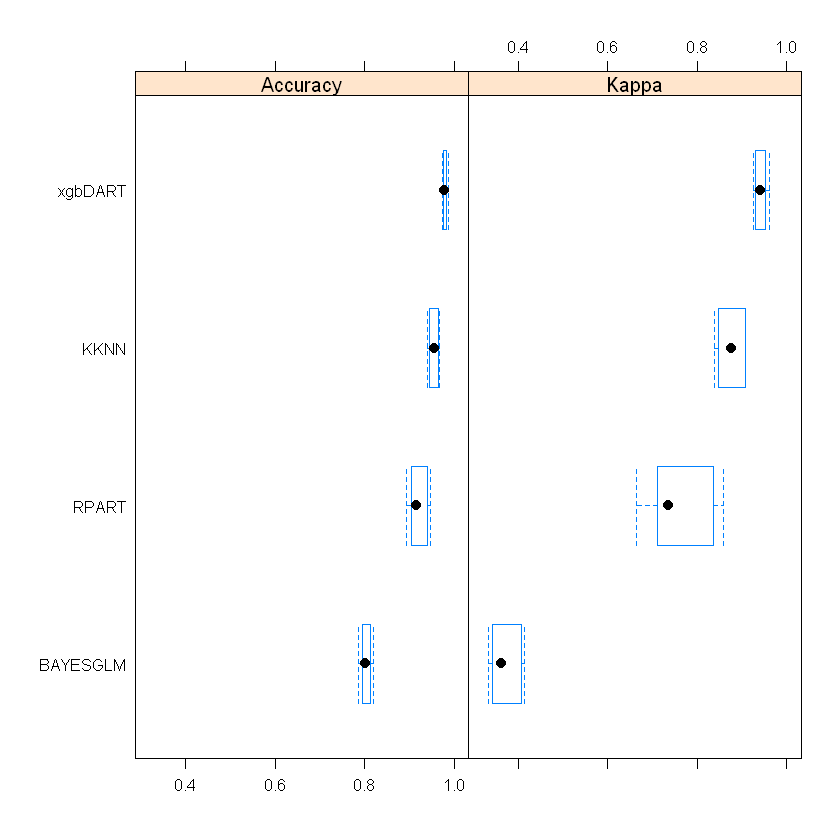

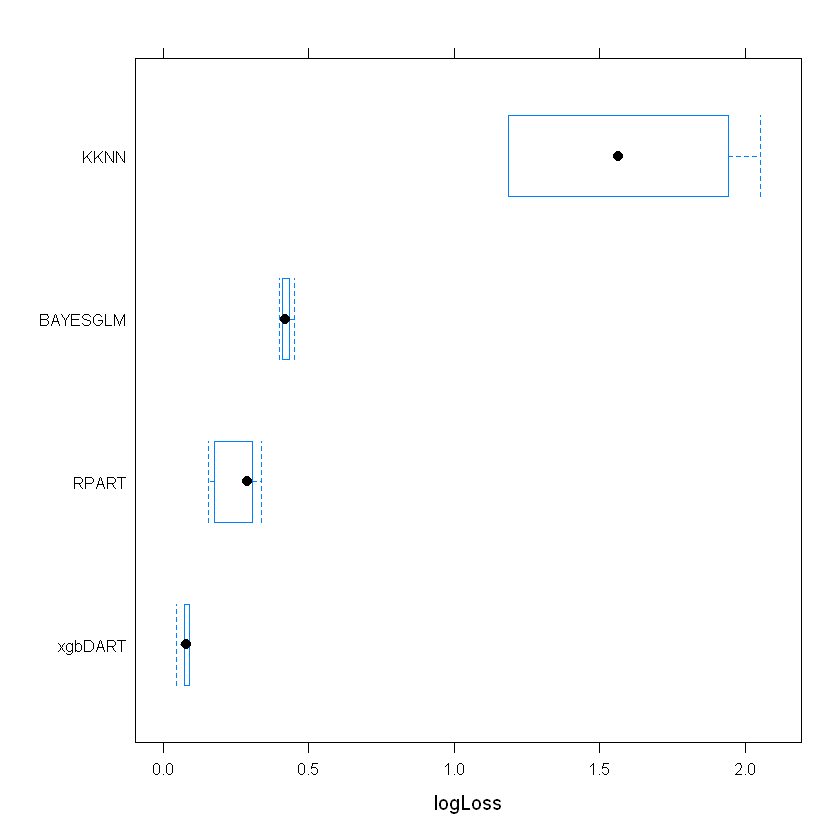

In [14]:
# Calculate resamples to analyze metrics - Note: NN results are not displayed as resample do not handle 
resample_results <- resamples(list(KKNN=m_kknn,xgbDART=m_xgbDART,BAYESGLM=m_bglm, RPART=m_rpart)) #collection, analyzing and visualizing a set of resampling results from a common data set.
summary(resample_results,metric = c("Kappa","Accuracy","logLoss"))

bwplot(resample_results , metric = c("Kappa","Accuracy"))
bwplot(resample_results , metric = "logLoss")

## 5. Testing all models to perform a selection or evaluate need for ensemble

In [30]:
tasa_corte = 0.65 #train dataset contains 25% "yes"

In [31]:
p1v <- predict(m_rpart, val_set, preProcess = c("center", "scale"),type = "prob")
p1v$si[p1v$si > tasa_corte] = "si"
p1v$si[p1v$si < tasa_corte] = "no"
p1v$no = NULL
p1v$si = as.factor(p1v$si)
Subp1 = data.frame(rownames(val_set), p1v$si )
Gain_rpart = sum(val_set$se_fue == Subp1$p1v.si)
Accuracy_rpart = Gain_rpart / 1599

confusionMatrix(factor(p1v$si), val_set$se_fue)

Confusion Matrix and Statistics

          Reference
Prediction   no   si
        no 1189  114
        si   33  263
                                          
               Accuracy : 0.9081          
                 95% CI : (0.8928, 0.9218)
    No Information Rate : 0.7642          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7244          
                                          
 Mcnemar's Test P-Value : 4.159e-11       
                                          
            Sensitivity : 0.9730          
            Specificity : 0.6976          
         Pos Pred Value : 0.9125          
         Neg Pred Value : 0.8885          
             Prevalence : 0.7642          
         Detection Rate : 0.7436          
   Detection Prevalence : 0.8149          
      Balanced Accuracy : 0.8353          
                                          
       'Positive' Class : no              
                        

In [32]:
p2v <- predict(m_bglm, val_set, preProcess = c("center", "scale"),type = "prob")

p2v$si[p2v$si > tasa_corte] = "si"
p2v$si[p2v$si < tasa_corte] = "no"
p2v$no = NULL
Subp2 = data.frame(rownames(val_set), p2v$si )
Gain_bglm = sum(val_set$se_fue == p2v$si)
Accuracy_bglm = Gain_bglm / 1599
confusionMatrix(factor(p2v$si), val_set$se_fue)

Confusion Matrix and Statistics

          Reference
Prediction   no   si
        no 1168  316
        si   54   61
                                          
               Accuracy : 0.7686          
                 95% CI : (0.7471, 0.7891)
    No Information Rate : 0.7642          
    P-Value [Acc > NIR] : 0.3525          
                                          
                  Kappa : 0.1548          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9558          
            Specificity : 0.1618          
         Pos Pred Value : 0.7871          
         Neg Pred Value : 0.5304          
             Prevalence : 0.7642          
         Detection Rate : 0.7305          
   Detection Prevalence : 0.9281          
      Balanced Accuracy : 0.5588          
                                          
       'Positive' Class : no              
                        

In [33]:
p3v <- predict(m_kknn, val_set, preProcess = c("center", "scale"),type = "prob")
p3v$si[p3v$si > tasa_corte] = "si"
p3v$si[p3v$si < tasa_corte] = "no"
p3v$no = NULL
Subp3 = data.frame(rownames(val_set), p3v$si )
Gain_kknn = sum(val_set$se_fue == p3v$si)
Accuracy_kknn = Gain_kknn / 1599
confusionMatrix(factor(p3v$si), val_set$se_fue)

Confusion Matrix and Statistics

          Reference
Prediction   no   si
        no 1164   24
        si   58  353
                                         
               Accuracy : 0.9487         
                 95% CI : (0.9367, 0.959)
    No Information Rate : 0.7642         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.862          
                                         
 Mcnemar's Test P-Value : 0.0002682      
                                         
            Sensitivity : 0.9525         
            Specificity : 0.9363         
         Pos Pred Value : 0.9798         
         Neg Pred Value : 0.8589         
             Prevalence : 0.7642         
         Detection Rate : 0.7280         
   Detection Prevalence : 0.7430         
      Balanced Accuracy : 0.9444         
                                         
       'Positive' Class : no             
                                         

In [34]:
p4v <- predict(m_xgbDART, val_set, preProcess = c("center", "scale"),type = "prob")
p4v$si[p4v$si > 0.65] = "si"
p4v$si[p4v$si != "si"] = "no"
p4v$no = NULL
Subp4 = data.frame(rownames(val_set), p4v$si )
Gain_xgbdart = sum(val_set$se_fue == p4v$si)
Accuracy_xgbdart = Gain_xgbdart / 1599
confusionMatrix(factor(p4v$si), val_set$se_fue)

Confusion Matrix and Statistics

          Reference
Prediction   no   si
        no 1215   24
        si    7  353
                                          
               Accuracy : 0.9806          
                 95% CI : (0.9726, 0.9868)
    No Information Rate : 0.7642          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9453          
                                          
 Mcnemar's Test P-Value : 0.004057        
                                          
            Sensitivity : 0.9943          
            Specificity : 0.9363          
         Pos Pred Value : 0.9806          
         Neg Pred Value : 0.9806          
             Prevalence : 0.7642          
         Detection Rate : 0.7598          
   Detection Prevalence : 0.7749          
      Balanced Accuracy : 0.9653          
                                          
       'Positive' Class : no              
                        

In [36]:
p5v <- predict(m_nnet, val_set, preProcess = c("center", "scale"),type = "prob")

p5v$si[p5v$si > tasa_corte] = "si"
p5v$si[p5v$si != "si"] = "no"

p5v$no = NULL
Subp5 = data.frame(rownames(val_set), p5v$si )
Gain_nnet = sum(val_set$se_fue == p5v$si)

Accuracy_nnet = Gain_nnet / 1599
confusionMatrix(factor(p5v$si), val_set$se_fue)

Confusion Matrix and Statistics

          Reference
Prediction   no   si
        no 1200   40
        si   22  337
                                          
               Accuracy : 0.9612          
                 95% CI : (0.9506, 0.9701)
    No Information Rate : 0.7642          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8906          
                                          
 Mcnemar's Test P-Value : 0.03085         
                                          
            Sensitivity : 0.9820          
            Specificity : 0.8939          
         Pos Pred Value : 0.9677          
         Neg Pred Value : 0.9387          
             Prevalence : 0.7642          
         Detection Rate : 0.7505          
   Detection Prevalence : 0.7755          
      Balanced Accuracy : 0.9379          
                                          
       'Positive' Class : no              
                        

In [49]:
testing_re = c(Accuracy_rpart, Accuracy_bglm, Accuracy_nnet, Accuracy_xgbdart, Accuracy_kknn)
testing_re

[1] 0.9080675 0.7686054 0.9612258 0.9806129 0.9487179

XGBoost outperformed other models, followed by neural networks

## 6. Preparing Submission

After analyzing model results, an ensemble might not be justified, as the other models do not add much to the mis-predicted entries by XGBoost. 

In [ ]:
#p1 <- predict(m_rpart, test, preProcess = c("center", "scale"),type = "prob")
#p2 <- predict(m_bglm, test, preProcess = c("center", "scale"),type = "prob")
#p3 <- predict(m_kknn, test, preProcess = c("center", "scale"),type = "prob")
p4 <- predict(m_xgbDART, test, preProcess = c("center", "scale"),type = "prob")
#p5 <- predict(m_nnet, test, preProcess = c("center", "scale"),type = "prob")

p4$pred = p4$si > 0.85


#analyze submission outputs to evaluate need for ensemble
#submission_pall <- data.frame(test_id,p1,p2,p3,p4,p5)  
#write.csv(submission_pall, file= "C:/Users/sanie.s.rojas.lobo/Documents/uzzipped/submission_ensemble.csv")

#save selected model results 
submission_xgbdart <- data.frame(test_id, p4$pred )
write.csv(submission_xgbdart, file= "C:/Users/sanie.s.rojas.lobo/Documents/uzzipped/submission_xgbdart.csv")